In [1]:
import mappy as mp
import pandas as pd
import pyfastx
import numpy as np
from pathlib import Path

# Make DF of reads

In [2]:
def reads_to_df(fastx_file: str) -> pd.DataFrame:
    fastx = pyfastx.Fastx(fastx_file)
    reads = list(zip(*[[x[0], x[1]] for x in fastx]))
    return pd.DataFrame({"name": reads[0], "sequence": reads[1]})

In [3]:
folder = Path(
    "/home/nanopore/nanopore_analysis/telomere-project/sequencing-basecalling/calib-detection/Telobait1/calibration_strands/"
)
dfs = []
for x in folder.iterdir():
    if x.suffix == ".fastq":
        dfs.append(reads_to_df(str(x)))

In [4]:
df = (
    pd.concat(dfs)
    .assign(read_len=lambda x: x.sequence.str.len())
)

In [5]:
df

,name,sequence,read_len
0,83de73d3-b8d3-47f7-afb0-2f53cda82145,TTATGTTGTTATGTAGGCGTACCTCGTTCAGTTACGTATTTTAGTC...,3581
1,652ee60b-95fa-4a57-abd9-2d5410943e85,GTTGTTTTTTTTTATTTTTACTTCGTTCAGTTACGTATTGCTAATT...,3605
2,4c8e21f7-c143-4265-af56-f4b05debd063,TTATGTTATGTATCGTCTTTCGTTCAGTTACGTATTGCTGATTGTT...,3547
3,b973f783-71ff-4092-b054-6716413b5492,GTGTTTTGCCTGTACTTGGTTCAGACTACGTATTGCTTCACTACTC...,3596
4,36123503-5e0f-4da0-953f-5a6c6416bf7b,GGTTATGTACGTGTACTTCGTTCAGTTACGTATTGCTCAGATTGTG...,3587
...,...,...,...
128,b589b9ef-ed1c-4226-bc05-1dea432134bf,TGTTATGTTGCCTGTACTTCGTTTTCAGGTTCGTAACTGCTTGTTA...,3589
129,cea303e5-5989-42af-8872-1556d140924f,ATTTTCCTGTTGCTTCGTTCCGCCCGTTTCTTGCTAGTCGCTTTTT...,3552
130,2fd2d868-d4e3-4bb5-b047-c59e6d4945ee,ATTGTTATGTTATGTTGCGTGTACACTTGGTACGGTTGCGTATTGC...,3638
131,5e3aeb83-a477-4745-b20d-ca33f3065cab,ATATGTATATACGTATTTCCTTCGTTGAGTTACGTATTGCTTGTTA...,3562


# Histogram of read lenght

array([[<AxesSubplot: title={'center': 'read_len'}>]], dtype=object)

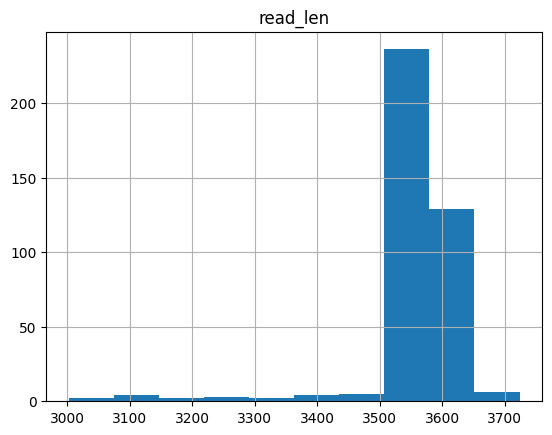

In [6]:
df.hist("read_len")

# Map with mappy

## Calculate average alignment score (mlen / seqlen)

In [7]:
def alignment_quality(df: pd.DataFrame):
    a = mp.Aligner("DNA-CS.fasta", preset="map-ont")
    alignment_scores = []
    
    for x in df.itertuples():
        seq = x.sequence
        seq_len = len(seq)
        
        for hit in a.map(seq):
            alignment_scores.append(hit.mlen / max(hit.ctg_len, seq_len))
            
    return np.array(alignment_scores)


In [8]:
alignment_list = alignment_quality(df)

In [9]:
print(f"Mean alignment value: {np.mean(alignment_list) * 100: .3}%")
print(f"Number of reads: {len(alignment_list): ,}")

Mean alignment value:  96.0%
Number of reads:  393
